# Exploratory Data Analysis (EDA)

In [1]:
# import libraries
import sys
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

# config graphs
%matplotlib inline
sns.set(rc={"figure.figsize": (26, 10)})

In [2]:
# load custom functions
sys.path.append("../")
from cnrdlib import cl_eda as cle

In [3]:
# load data from data-etl notebook
engine = create_engine(f"sqlite:///../data/RawData.db")
df = pd.read_sql_table("SensorData_5min", con=engine, index_col="timestamp")
df.head()

WIP_temp   DP_temp   Ext_temp  WIP_current  DP_current
timestamp                                                                  
2021-03-30 00:00:00  4.828750  3.028125  17.063750     5.881250    9.741250
2021-03-30 00:05:00  4.299444  3.080000  17.474444     6.122778    9.839444
2021-03-30 00:10:00  4.506471  2.900588  17.605882     5.895000    9.783750
2021-03-30 00:15:00  4.075000  3.020000  17.395000     5.597059    9.704118
2021-03-30 00:20:00  4.044118  3.010000  17.536471     5.254118    8.987647

In [4]:
dfe = pd.read_sql_table("SensorData_1hour", con=engine, index_col="timestamp")
dfe.head()

WIP_temp   DP_temp   Ext_temp  WIP_currentAh  \
timestamp                                                           
2021-03-30 00:00:00  5.073109  2.975897  17.275080       4.867222   
2021-03-30 01:00:00  7.224663  2.952083  16.797564       5.713958   
2021-03-30 02:00:00  5.174319  4.074458  15.969708       4.247333   
2021-03-30 03:00:00  7.380833  5.051847  16.267139       5.159278   
2021-03-30 04:00:00  5.196708  2.939181  16.383194       5.470403   

                     DP_currentAh  WIP_energy  DP_energy  
timestamp                                                 
2021-03-30 00:00:00      5.336014    2.866294   3.142364  
2021-03-30 01:00:00      2.960903    3.364934   1.743668  
2021-03-30 02:00:00      6.237069    2.501243   3.672993  
2021-03-30 03:00:00      2.948403    3.038285   1.736306  
2021-03-30 04:00:00      6.847056    3.221505   4.032212

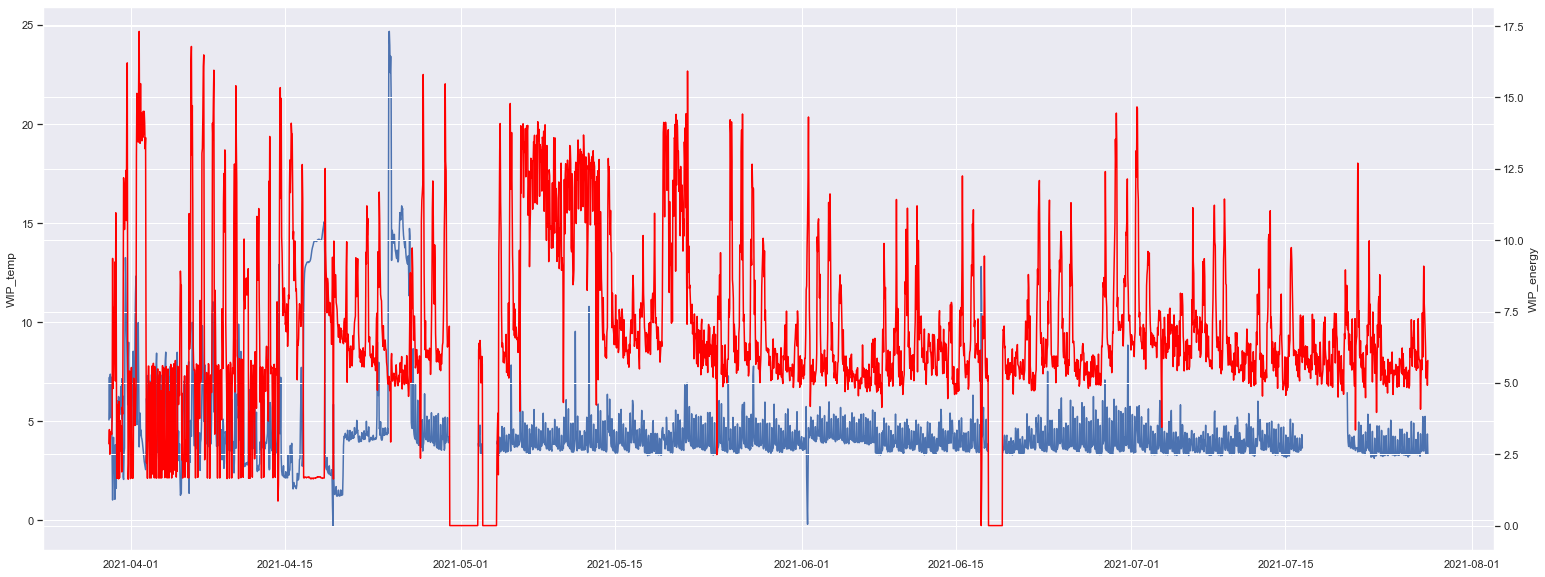

In [5]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(dfe.index, dfe.WIP_temp)
ax2.plot(dfe.index, dfe.WIP_energy, color="red")

# ax1.set_xlabel('X data')
ax1.set_ylabel("WIP_temp")
ax2.set_ylabel("WIP_energy")

plt.show()

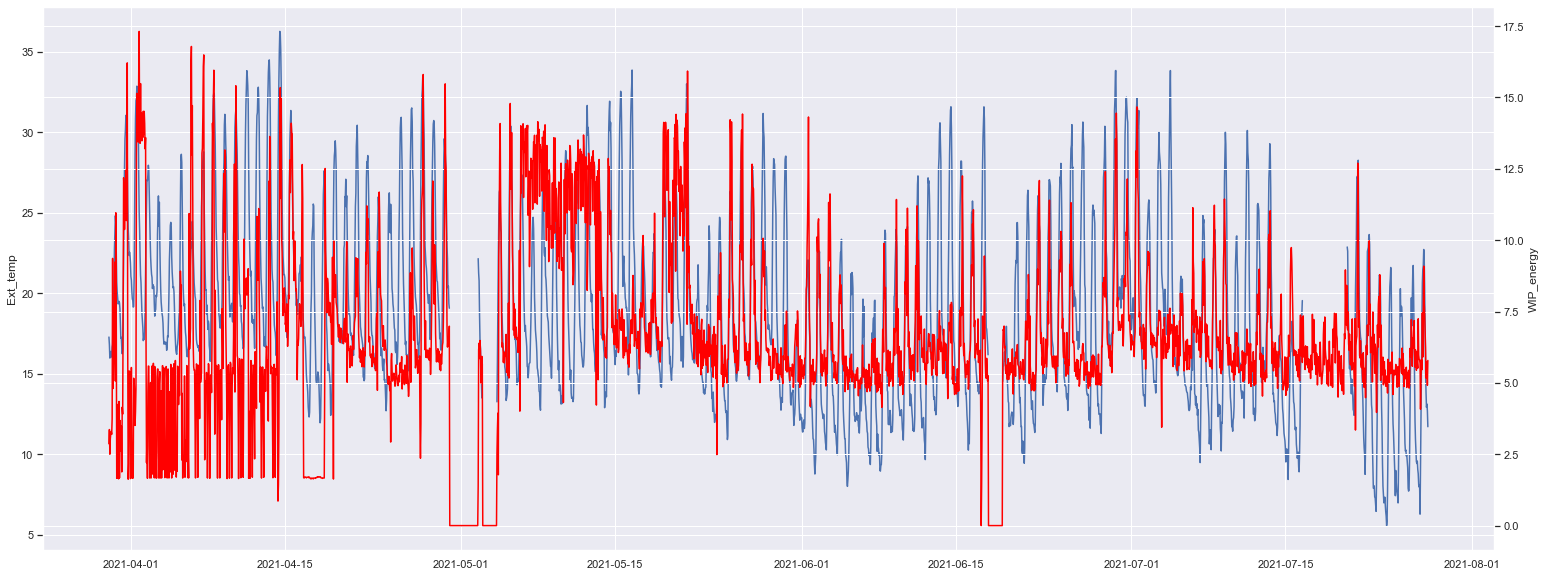

In [6]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(dfe.index, dfe.Ext_temp)
ax2.plot(dfe.index, dfe.WIP_energy, color="red")

# ax1.set_xlabel('X data')
ax1.set_ylabel("Ext_temp")
ax2.set_ylabel("WIP_energy")

plt.show()

In [8]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dfe.index, y=dfe.WIP_energy, mode='lines', name='energy'))
fig.add_trace(go.Scatter(x=dfe.index, y=dfe.WIP_temp, mode='lines', name='cold room temp'))
fig.show()

In [9]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dfe.index, y=dfe.WIP_energy, mode='lines', name='energy'))
fig.add_trace(go.Scatter(x=dfe.index, y=dfe.Ext_temp, mode='lines', name='external temp'))
fig.show()

In [10]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dfe.index, y=dfe.WIP_energy, mode='lines', name='energy'))
fig.add_trace(go.Scatter(x=dfe.index, y=dfe.WIP_temp, mode='lines', name='cold room temp'))
fig.add_trace(go.Scatter(x=dfe.index, y=dfe.Ext_temp, mode='lines', name='external temp'))
fig.show()


- There appears to be some peaks in energy that match daily temperatures during week days, but not much variation on weekends. The day of the week may be a good feature to use.
- There are some periods where no clear pattern is seen - these may be specific plant conditions or maintenance.

In [33]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dfe.index, y=dfe.DP_energy, mode='lines', name='energy'))
fig.add_trace(go.Scatter(x=dfe.index, y=dfe.DP_temp, mode='lines', name='cold room temp'))
fig.add_trace(go.Scatter(x=dfe.index, y=dfe.Ext_temp, mode='lines', name='external temp'))
fig.show()

In [30]:
dfe["weekday"] = dfe.index.day_name()

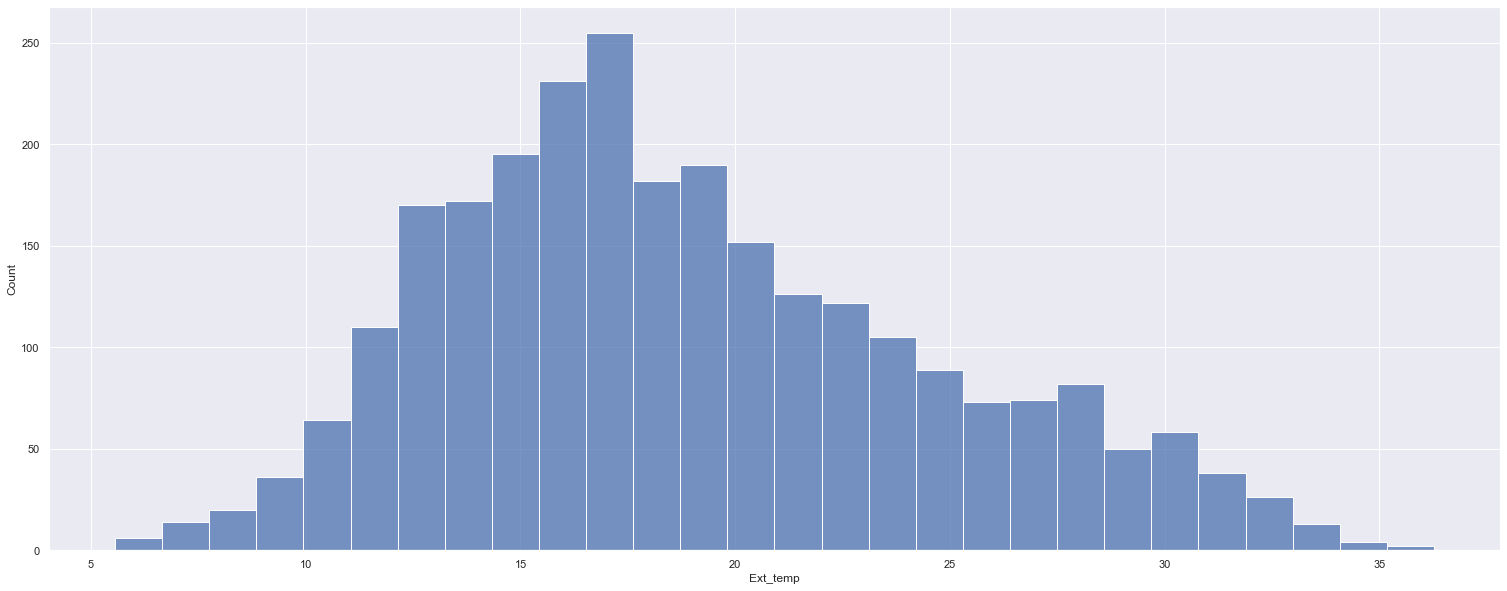

In [19]:
sns.histplot(data=dfe, x="Ext_temp");

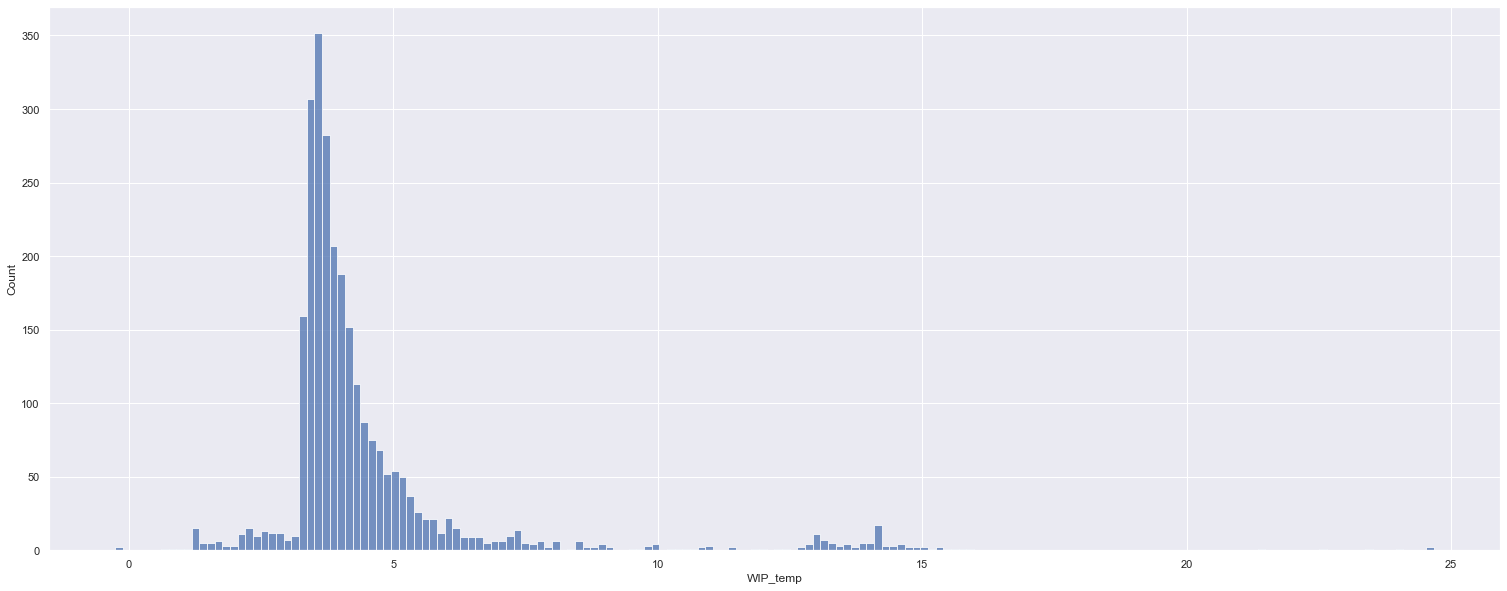

In [20]:
sns.histplot(data=dfe, x="WIP_temp");

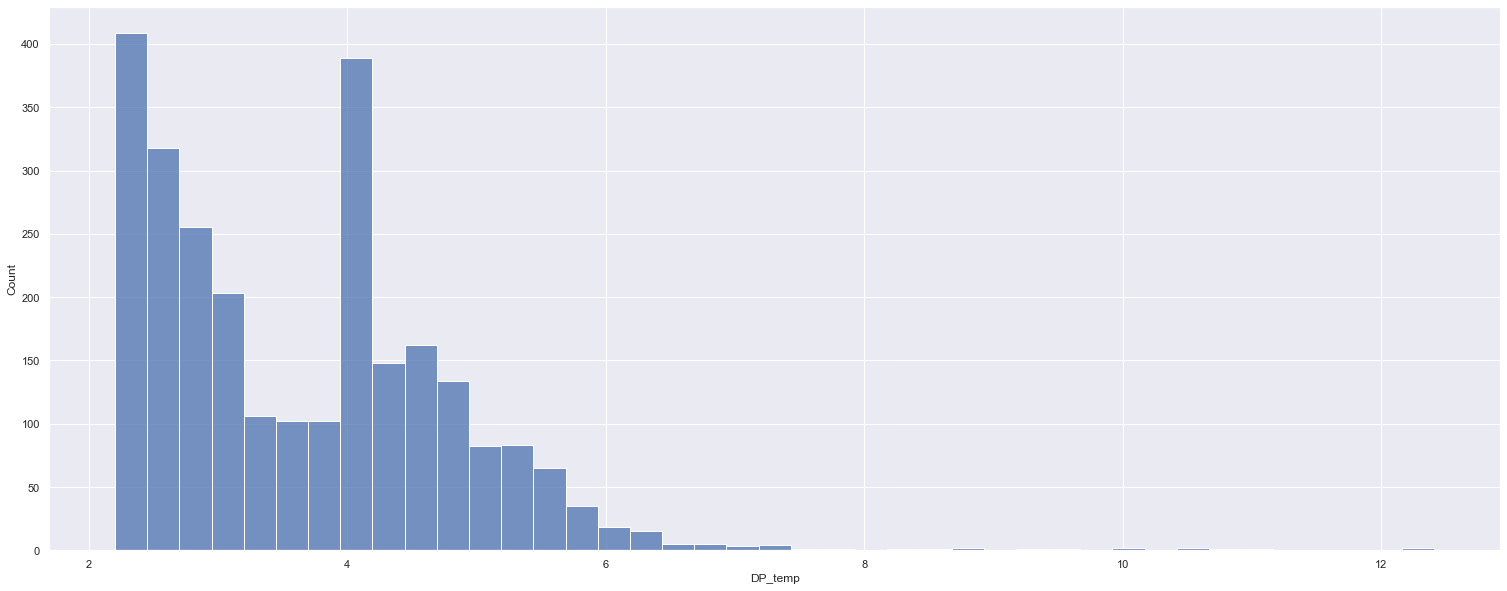

In [34]:
sns.histplot(data=dfe, x="DP_temp");

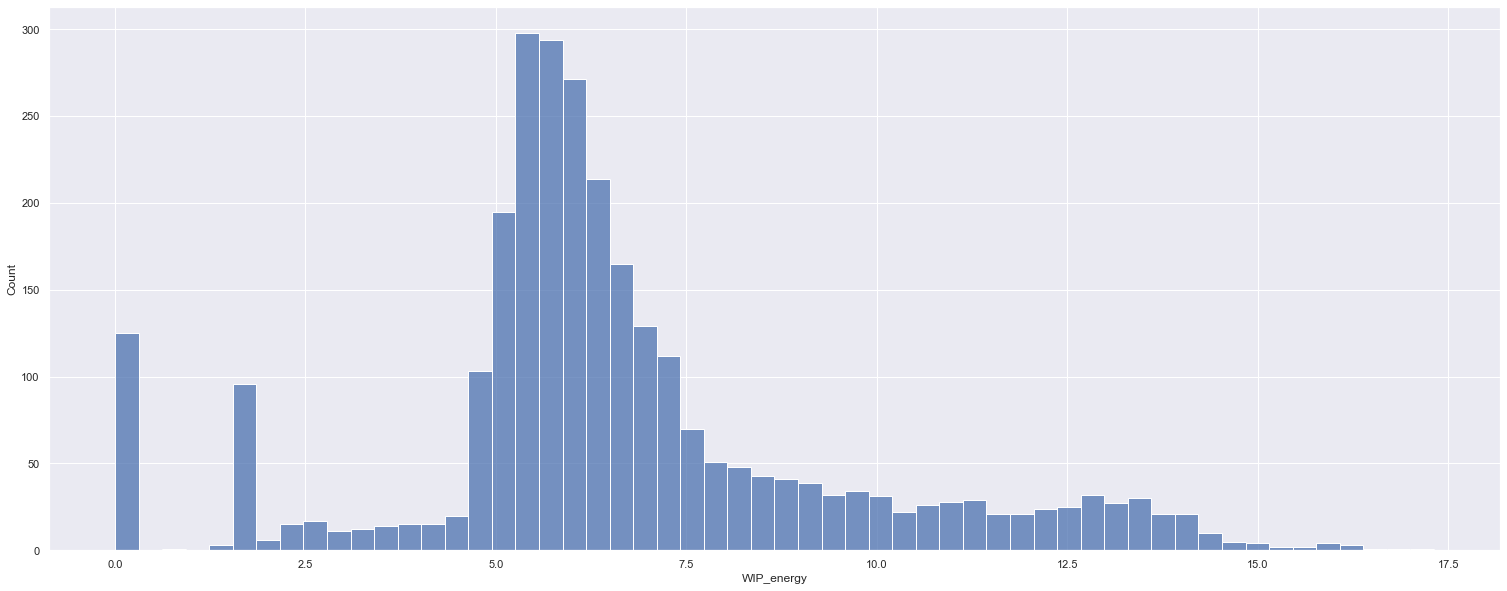

In [21]:
sns.histplot(data=dfe, x="WIP_energy");

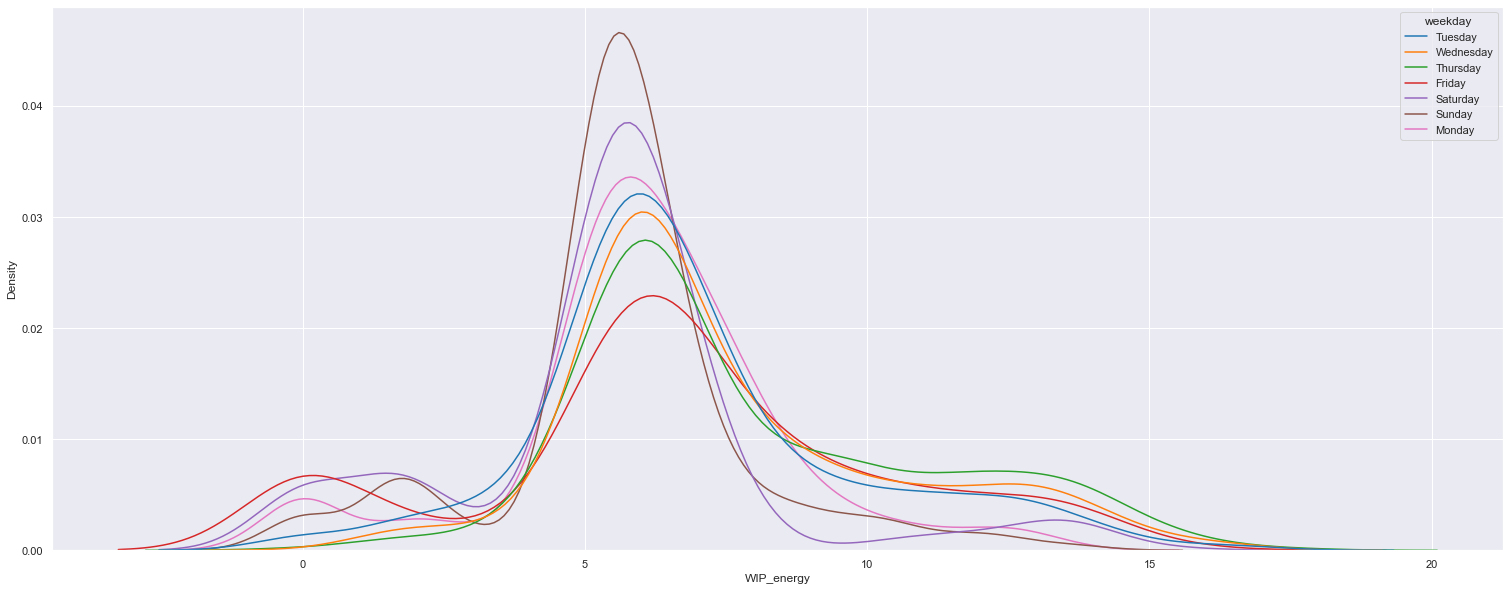

In [31]:
sns.kdeplot(data=dfe, x="WIP_energy", hue="weekday", palette="tab10");

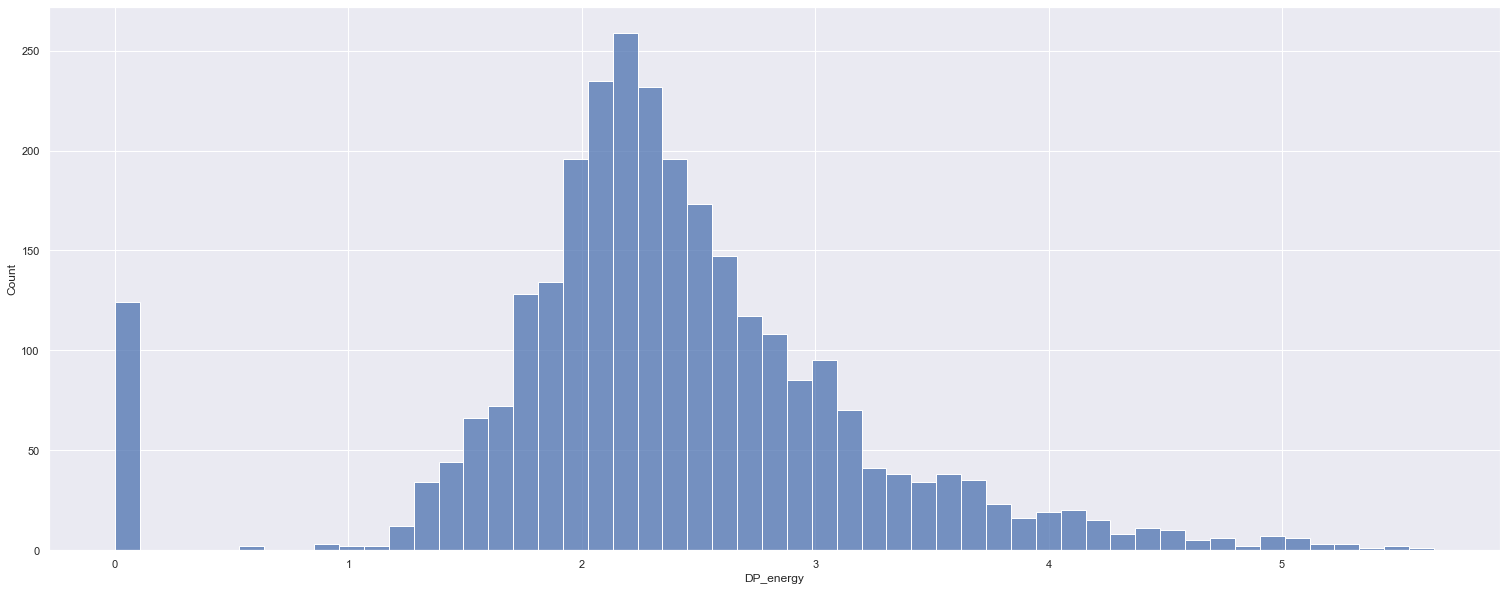

In [35]:
sns.histplot(data=dfe, x="DP_energy");

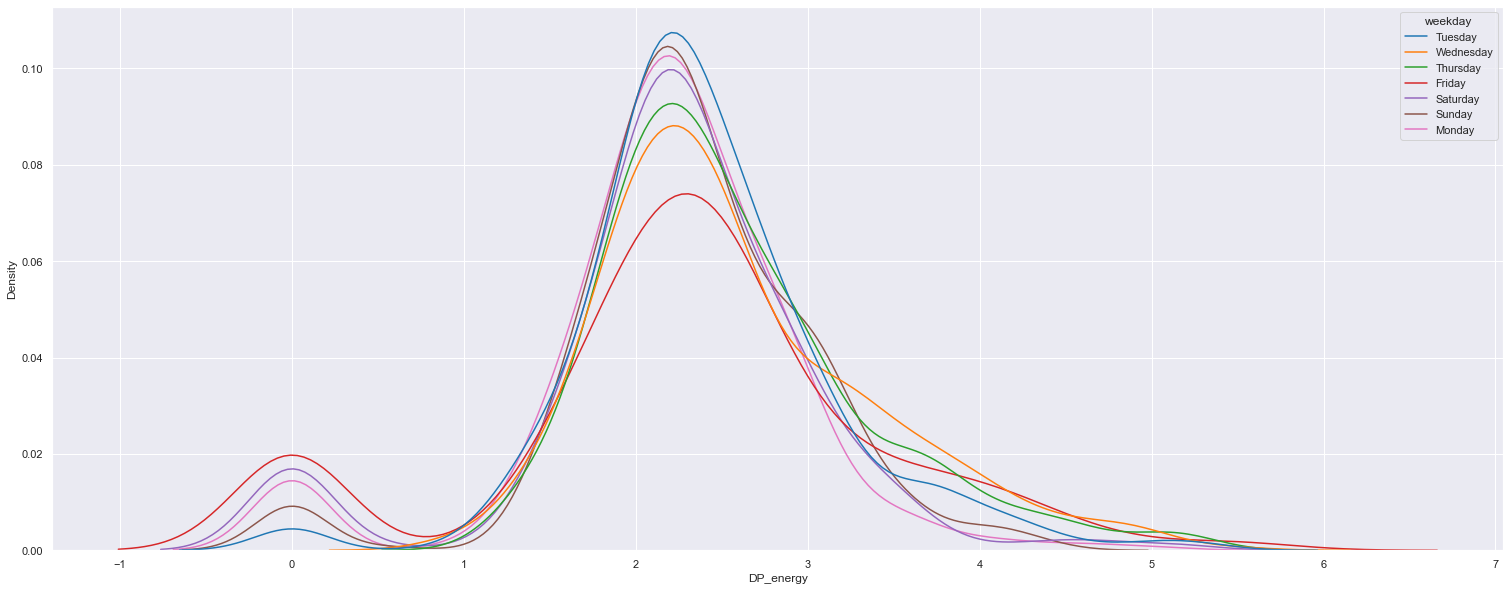

In [36]:
sns.kdeplot(data=dfe, x="DP_energy", hue="weekday", palette="tab10");

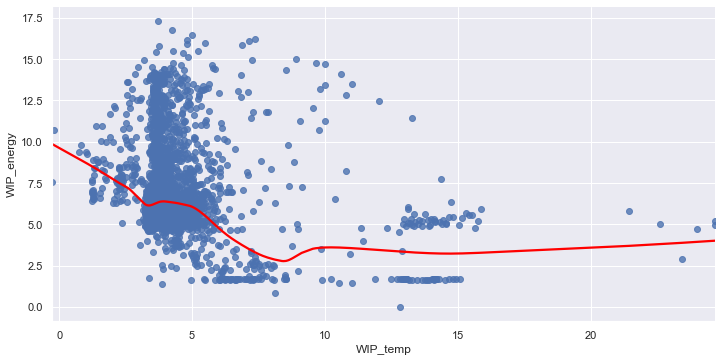

In [22]:
sns.lmplot(x="WIP_temp", y="WIP_energy", data=dfe, aspect=2, lowess=True, line_kws={'color': 'red'});

- The WIP temperature is more an operating parameter rather than a variable that affects energy consumption. 
- The temperature is concentrated around the 4dC mark (the setpoint) and variation in energy consumption can be seen.

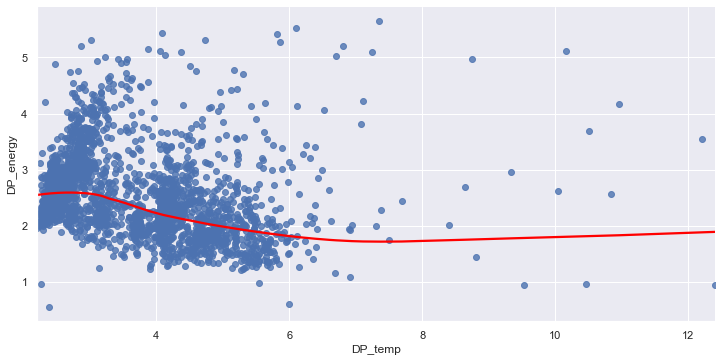

In [37]:
sns.lmplot(x="DP_temp", y="DP_energy", data=dfe, aspect=2, lowess=True, line_kws={'color': 'red'});

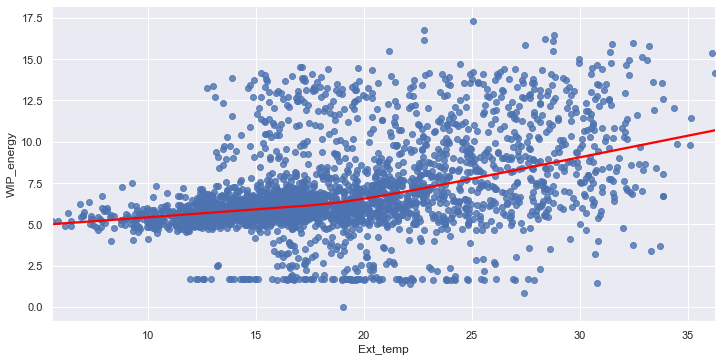

In [23]:
sns.lmplot(x="Ext_temp", y="WIP_energy", data=dfe, aspect=2, lowess=True, line_kws={'color': 'red'});

- Seems to be a correlation between energy and external temperature, which makes sense. The hotter it is outide, the more cooling energy is required. This also depends on the quality of the insulation.
- Other factors that are not measured are the number of times the fridge door is opened and it hot cheese is placed in the cold room.

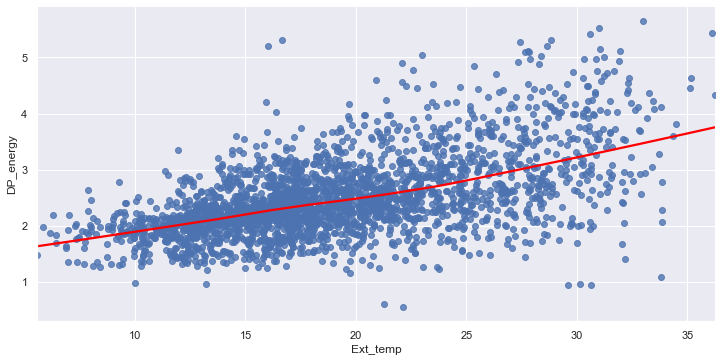

In [38]:
sns.lmplot(x="Ext_temp", y="DP_energy", data=dfe, aspect=2, lowess=True, line_kws={'color': 'red'});

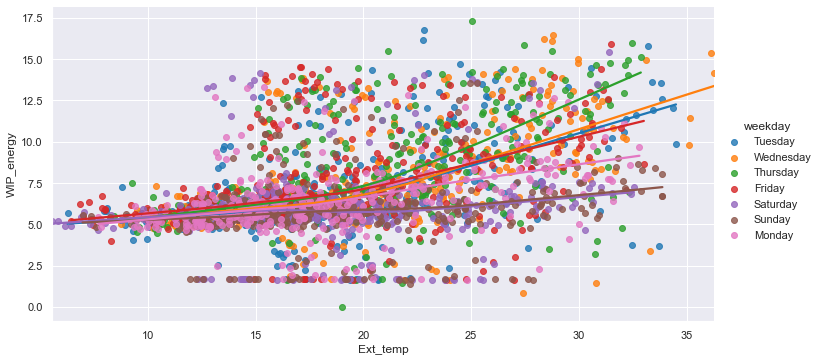

In [32]:
sns.lmplot(x="Ext_temp", y="WIP_energy", data=dfe, aspect=2, lowess=True, hue="weekday", palette="tab10");

- As though earlier, energy consumption on Saterdays and Sundays are different from other days during the week. No works takes place on weekends.
- During the week, there is constant movement in and out of the cold room and adding new product.

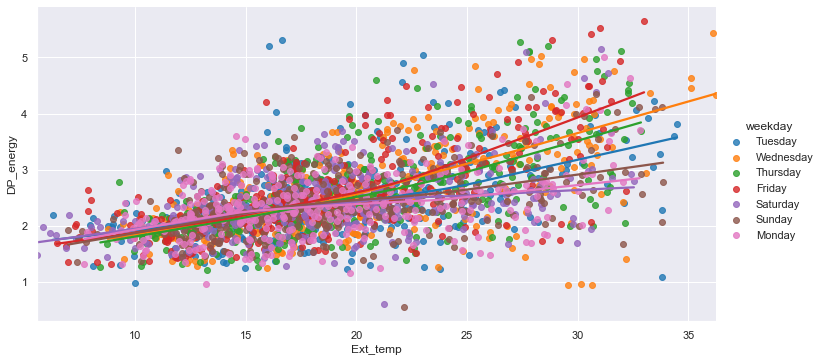

In [39]:
sns.lmplot(x="Ext_temp", y="DP_energy", data=dfe, aspect=2, lowess=True, hue="weekday", palette="tab10");

In [40]:
dfe.head()

WIP_temp   DP_temp   Ext_temp  WIP_currentAh  \
timestamp                                                           
2021-03-30 00:00:00  5.073109  2.975897  17.275080       4.867222   
2021-03-30 01:00:00  7.224663  2.952083  16.797564       5.713958   
2021-03-30 02:00:00  5.174319  4.074458  15.969708       4.247333   
2021-03-30 03:00:00  7.380833  5.051847  16.267139       5.159278   
2021-03-30 04:00:00  5.196708  2.939181  16.383194       5.470403   

                     DP_currentAh  WIP_energy  DP_energy  weekday  
timestamp                                                          
2021-03-30 00:00:00      5.336014    2.866294   3.142364  Tuesday  
2021-03-30 01:00:00      2.960903    3.364934   1.743668  Tuesday  
2021-03-30 02:00:00      6.237069    2.501243   3.672993  Tuesday  
2021-03-30 03:00:00      2.948403    3.038285   1.736306  Tuesday  
2021-03-30 04:00:00      6.847056    3.221505   4.032212  Tuesday

In [41]:
dfe["SEC_WIP"] = dfe.WIP_energy / dfe.Ext_temp
dfe["SEC_DP"] = dfe.DP_energy / dfe.Ext_temp

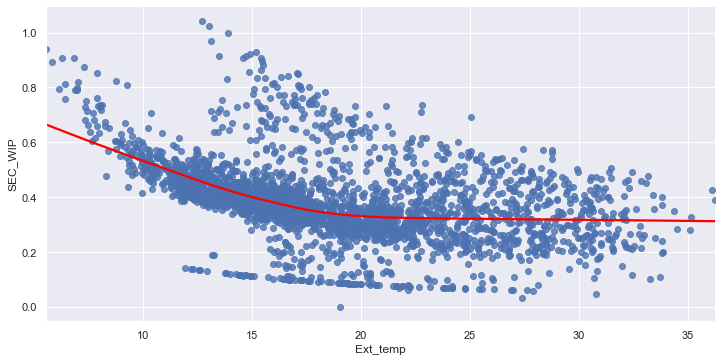

In [42]:
sns.lmplot(x="Ext_temp", y="SEC_WIP", data=dfe, aspect=2, lowess=True, line_kws={'color': 'red'});

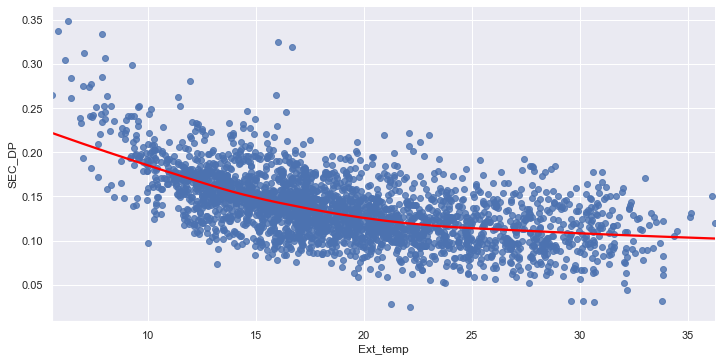

In [43]:
sns.lmplot(x="Ext_temp", y="SEC_DP", data=dfe, aspect=2, lowess=True, line_kws={'color': 'red'});

In [44]:
base_temperature = 4

In [45]:
dfe["CDD"] = dfe.Ext_temp - base_temperature
dfe.head(10)

WIP_temp   DP_temp   Ext_temp  WIP_currentAh  \
timestamp                                                           
2021-03-30 00:00:00  5.073109  2.975897  17.275080       4.867222   
2021-03-30 01:00:00  7.224663  2.952083  16.797564       5.713958   
2021-03-30 02:00:00  5.174319  4.074458  15.969708       4.247333   
2021-03-30 03:00:00  7.380833  5.051847  16.267139       5.159278   
2021-03-30 04:00:00  5.196708  2.939181  16.383194       5.470403   
2021-03-30 05:00:00  7.231542  2.876722  16.146403       5.596389   
2021-03-30 06:00:00  5.729069  2.867722  16.030556       5.429208   
2021-03-30 07:00:00  3.029889  3.018097  16.657806       6.356736   
2021-03-30 08:00:00  1.031431  4.473361  16.815000      15.896917   
2021-03-30 09:00:00  3.352250  5.992347  18.372875       8.160875   

                     DP_currentAh  WIP_energy  DP_energy  weekday   SEC_WIP  \
timestamp                                                                     
2021-03-30 00:00:00      5.336014    2.866294   3.142364  Tuesday  0.165921   
2021-03-30 01:00:00      2.960903    3.364934   1.743668  Tuesday  0.200323   
2021-03-30 02:00:00      6.237069    2.501243   3.672993  Tuesday  0.156624   
2021-03-30 03:00:00      2.948403    3.038285   1.736306  Tuesday  0.186774   
2021-03-30 04:00:00      6.847056    3.221505   4.032212  Tuesday  0.196635   
2021-03-30 05:00:00      2.830000    3.295698   1.666579  Tuesday  0.204113   
2021-03-30 06:00:00      8.827097    3.197246   5.198253  Tuesday  0.199447   
2021-03-30 07:00:00      9.017361    3.743465   5.310299  Tuesday  0.224727   
2021-03-30 08:00:00      5.679292    9.361651   3.344519  Tuesday  0.556744   
2021-03-30 09:00:00      5.329389    4.805917   3.138463  Tuesday  0.261577   

                       SEC_DP        CDD  
timestamp                                 
2021-03-30 00:00:00  0.181902  13.275080  
2021-03-30 01:00:00  0.103805  12.797564  
2021-03-30 02:00:00  0.229998  11.969708  
2021-03-30 03:00:00  0.106737  12.267139  
2021-03-30 04:00:00  0.246119  12.383194  
2021-03-30 05:00:00  0.103217  12.146403  
2021-03-30 06:00:00  0.324272  12.030556  
2021-03-30 07:00:00  0.318787  12.657806  
2021-03-30 08:00:00  0.198901  12.815000  
2021-03-30 09:00:00  0.170820  14.372875

In [46]:
dfe["CDD_check"] = 0
dfe["CDD_check"][dfe.CDD > 0] = 1
dfe.head(10)

WIP_temp   DP_temp   Ext_temp  WIP_currentAh  \
timestamp                                                           
2021-03-30 00:00:00  5.073109  2.975897  17.275080       4.867222   
2021-03-30 01:00:00  7.224663  2.952083  16.797564       5.713958   
2021-03-30 02:00:00  5.174319  4.074458  15.969708       4.247333   
2021-03-30 03:00:00  7.380833  5.051847  16.267139       5.159278   
2021-03-30 04:00:00  5.196708  2.939181  16.383194       5.470403   
2021-03-30 05:00:00  7.231542  2.876722  16.146403       5.596389   
2021-03-30 06:00:00  5.729069  2.867722  16.030556       5.429208   
2021-03-30 07:00:00  3.029889  3.018097  16.657806       6.356736   
2021-03-30 08:00:00  1.031431  4.473361  16.815000      15.896917   
2021-03-30 09:00:00  3.352250  5.992347  18.372875       8.160875   

                     DP_currentAh  WIP_energy  DP_energy  weekday   SEC_WIP  \
timestamp                                                                     
2021-03-30 00:00:00      5.336014    2.866294   3.142364  Tuesday  0.165921   
2021-03-30 01:00:00      2.960903    3.364934   1.743668  Tuesday  0.200323   
2021-03-30 02:00:00      6.237069    2.501243   3.672993  Tuesday  0.156624   
2021-03-30 03:00:00      2.948403    3.038285   1.736306  Tuesday  0.186774   
2021-03-30 04:00:00      6.847056    3.221505   4.032212  Tuesday  0.196635   
2021-03-30 05:00:00      2.830000    3.295698   1.666579  Tuesday  0.204113   
2021-03-30 06:00:00      8.827097    3.197246   5.198253  Tuesday  0.199447   
2021-03-30 07:00:00      9.017361    3.743465   5.310299  Tuesday  0.224727   
2021-03-30 08:00:00      5.679292    9.361651   3.344519  Tuesday  0.556744   
2021-03-30 09:00:00      5.329389    4.805917   3.138463  Tuesday  0.261577   

                       SEC_DP        CDD  CDD_check  
timestamp                                            
2021-03-30 00:00:00  0.181902  13.275080          1  
2021-03-30 01:00:00  0.103805  12.797564          1  
2021-03-30 02:00:00  0.229998  11.969708          1  
2021-03-30 03:00:00  0.106737  12.267139          1  
2021-03-30 04:00:00  0.246119  12.383194          1  
2021-03-30 05:00:00  0.103217  12.146403          1  
2021-03-30 06:00:00  0.324272  12.030556          1  
2021-03-30 07:00:00  0.318787  12.657806          1  
2021-03-30 08:00:00  0.198901  12.815000          1  
2021-03-30 09:00:00  0.170820  14.372875          1

In [47]:
dfe.CDD_check[dfe.CDD_check == 0]

timestamp
2021-04-30 00:00:00    0
2021-04-30 01:00:00    0
2021-04-30 02:00:00    0
2021-04-30 03:00:00    0
2021-04-30 04:00:00    0
                      ..
2021-07-20 10:00:00    0
2021-07-20 11:00:00    0
2021-07-20 12:00:00    0
2021-07-20 13:00:00    0
2021-07-20 14:00:00    0
Name: CDD_check, Length: 221, dtype: int64

In [48]:
dfe["CDD_calc"] = dfe.CDD * dfe.CDD_check

In [74]:
dfe_daily = dfe.resample("D").agg({"CDD_calc": "sum", "WIP_energy": "sum", "DP_energy": "sum", "WIP_temp": "mean", "DP_temp": "mean", "Ext_temp": "mean"})
dfe_daily.head()

CDD_calc  WIP_energy  DP_energy  WIP_temp   DP_temp   Ext_temp
timestamp                                                                   
2021-03-30  367.787450  110.537098  71.596683  4.433404  3.403361  19.324477
2021-03-31  461.631917  168.865942  65.986250  6.679787  5.369823  23.234663
2021-04-01  500.827097  217.912840  79.199633  6.811911  5.012303  24.867796
2021-04-02  435.263972  180.258004  67.716512  4.660113  3.033002  22.135999
2021-04-03  401.512639   81.340250  65.362633  5.866149  2.943845  20.729693

In [75]:
dfe_daily.CDD_calc = dfe_daily.CDD_calc/24
dfe_daily.head()

CDD_calc  WIP_energy  DP_energy  WIP_temp   DP_temp   Ext_temp
timestamp                                                                  
2021-03-30  15.324477  110.537098  71.596683  4.433404  3.403361  19.324477
2021-03-31  19.234663  168.865942  65.986250  6.679787  5.369823  23.234663
2021-04-01  20.867796  217.912840  79.199633  6.811911  5.012303  24.867796
2021-04-02  18.135999  180.258004  67.716512  4.660113  3.033002  22.135999
2021-04-03  16.729693   81.340250  65.362633  5.866149  2.943845  20.729693

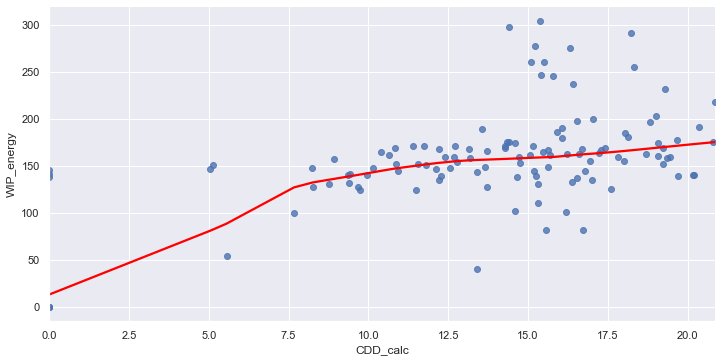

In [76]:
sns.lmplot(x="CDD_calc", y="WIP_energy", data=dfe_daily, aspect=2, lowess=True, line_kws={'color': 'red'});

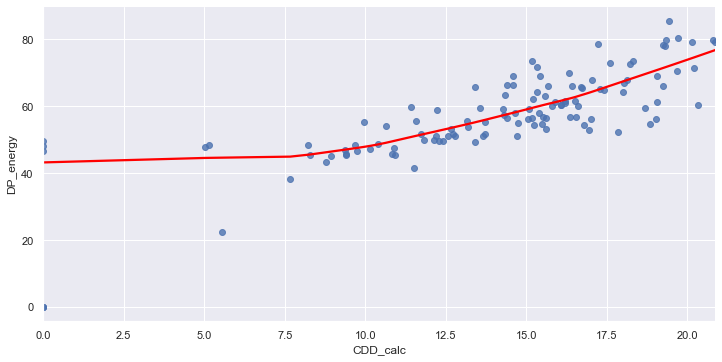

In [77]:
sns.lmplot(x="CDD_calc", y="DP_energy", data=dfe_daily, aspect=2, lowess=True, line_kws={'color': 'red'});

In [94]:
from plotly.subplots import make_subplots

In [97]:
fig = go.Figure()
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=dfe_daily.index, y=dfe_daily.DP_energy, mode='lines', name='energy'), secondary_y=False)
fig.add_trace(go.Scatter(x=dfe_daily.index, y=dfe_daily.DP_temp, mode='lines', name='cold room temp'), secondary_y=True)
fig.add_trace(go.Scatter(x=dfe_daily.index, y=dfe_daily.Ext_temp, mode='lines', name='external temp'), secondary_y=True)
fig.show()

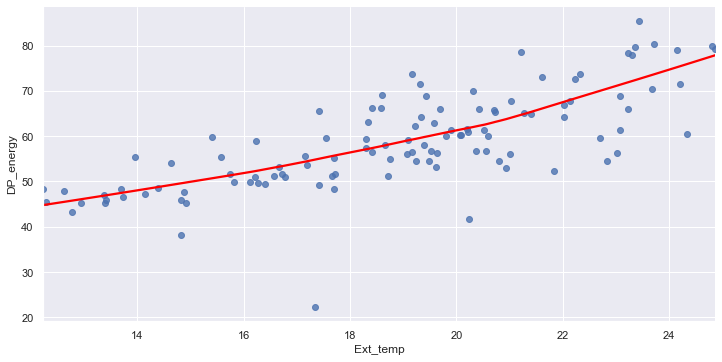

In [99]:
sns.lmplot(data=dfe_daily, x="Ext_temp", y="DP_energy", aspect=2, lowess=True, line_kws={'color': 'red'});

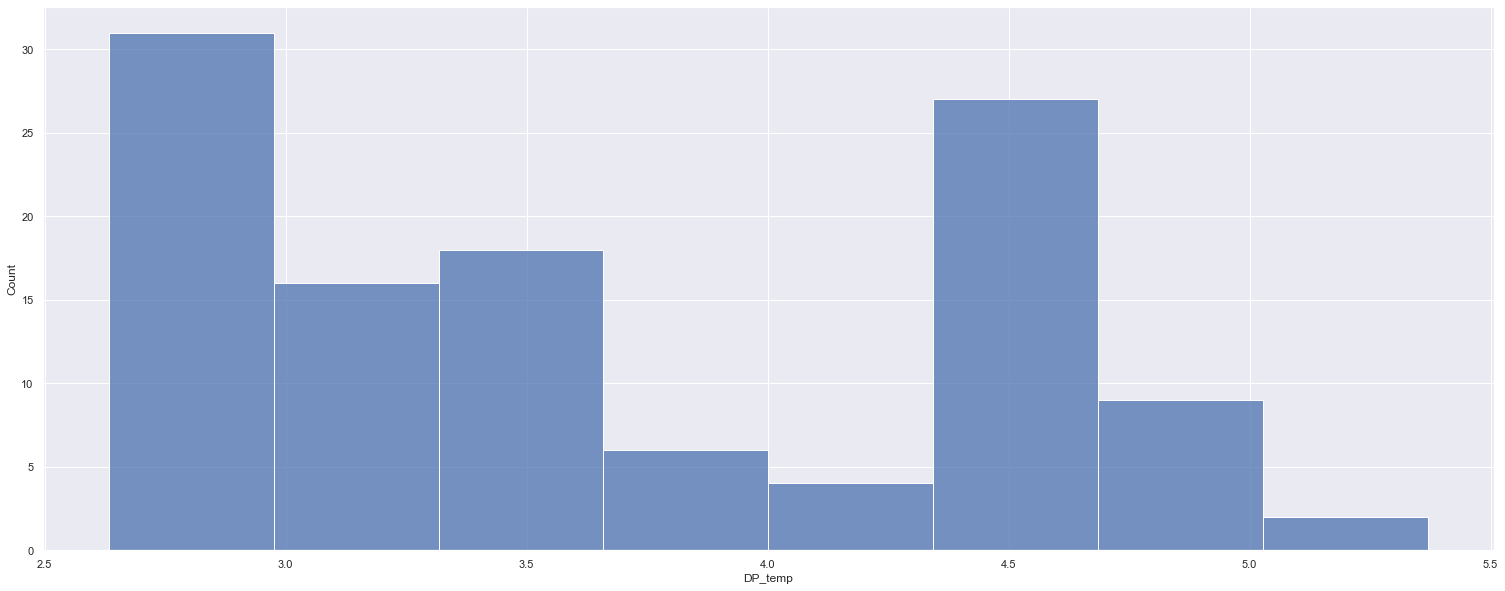

In [102]:
sns.histplot(data=dfe_daily, x="DP_temp");

In [103]:
dfe_daily["DP_setpoint"] = "low"
dfe_daily["DP_setpoint"][dfe_daily.DP_temp > 3.5] = "high"

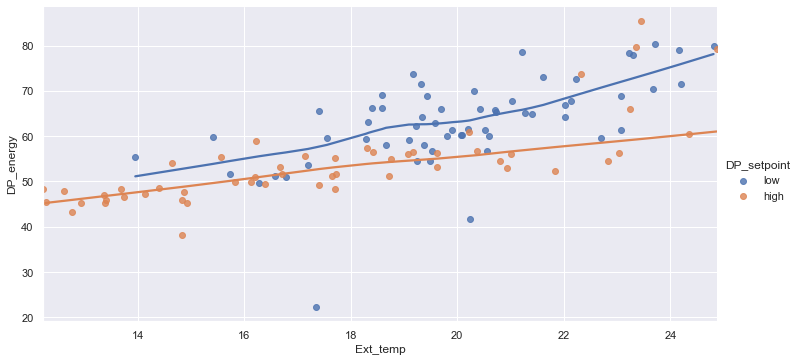

In [104]:
sns.lmplot(data=dfe_daily, x="Ext_temp", y="DP_energy", aspect=2, lowess=True, hue="DP_setpoint");

- As expected, the lower the setpoint, the more energy is being used. Noting that energy is highly influenced by the external temperature.

In [121]:
# scatter plot
import colorlover as cl

scl = cl.scales["9"]["seq"]["Blues"]
colorscale = [[float(i) / float(len(scl) - 1), scl[i]] for i in range(len(scl))]

trace = go.Scatter(
    x=dfe_daily.Ext_temp,
    y=dfe_daily.DP_energy,
    text=dfe_daily.index,
    mode="markers+text",
    textposition="top center",
    hoverinfo="text",
    marker=dict(opacity=0.5, sizemin=5, sizemode="area"),
)
trace_c = go.Histogram2dContour(
    x=dfe_daily.Ext_temp,
    y=dfe_daily.DP_energy,
    ncontours=5,
    colorscale=colorscale,
    showscale=False,
    opacity=0.3,
)
data = [trace, trace_c]
layout = go.Layout(title="Scatter plot")
fig = go.Figure(data=data, layout=layout)
fig.show()

In [122]:
dfe_daily.drop(["2021-05-02", "2021-05-04"], inplace=True)

In [127]:
dfe_daily = dfe_daily[dfe_daily.DP_energy > 0]

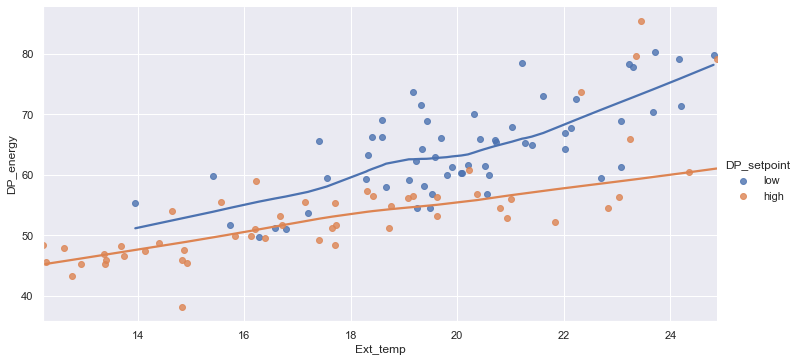

In [128]:
sns.lmplot(data=dfe_daily, x="Ext_temp", y="DP_energy", aspect=2, lowess=True, hue="DP_setpoint");

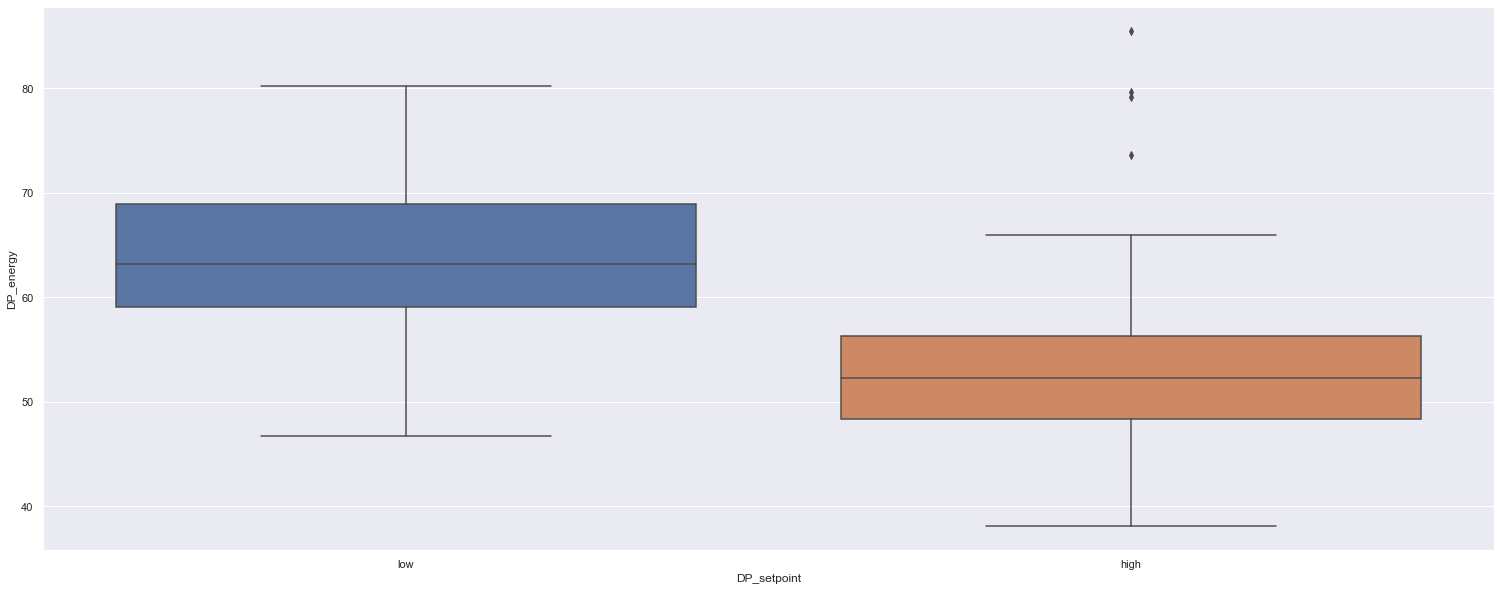

In [129]:
sns.boxplot(x="DP_setpoint", y="DP_energy", data=dfe_daily);

In [130]:
low_sp_mean = dfe_daily.DP_energy[dfe_daily.DP_setpoint == "low"].mean()
high_sp_mean = dfe_daily.DP_energy[dfe_daily.DP_setpoint == "high"].mean()
mean_difference = low_sp_mean - high_sp_mean
print(f"Mean energy difference is {mean_difference:0.2f} kWh per day")
print(f"Over a year, that equates to {mean_difference*365:0.0f} kWh per annum")
print(f"That is approximately a reduction of {mean_difference*365*1.04:0.0f} kg CO2e and saving R {mean_difference*365*1.80:0.0f} per annum")

Mean energy difference is 9.69 kWh per day
Over a year, that equates to 3538 kWh per annum
That is approximately a reduction of 3679 kg CO2e and saving R 6368 per annum


In [131]:
dfe_daily.to_csv("../data/daily_data.csv.gz", compression="gzip")